# Numerical Integration

Our first topic today will be about numerical integration, which is useful in determining of course the integrals of functions. Here we will only refer to 3 different methods with increasing accuracy.


In [1]:
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

plt.rcParams.update({'font.size': 12,
                     'axes.titlesize': 18,
                     'axes.labelsize': 16,
                     'axes.labelpad': 14,
                     'lines.linewidth': 1,
                     'lines.markersize': 10,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',}) 

## Box method

![box](img/box.png)

The simplest method for the numerical integration of a function $f(x)$ is the box method. There you approximate the function in a certain intervall $\Delta x$ by a horizontal line at the function value of the left edge of the intervall for example.

\begin{equation}
\int_{a}^{b}f(x)\approx \sum_{i}f(x_{i})\Delta x
\end{equation}

So lets write a function for that:


In [58]:
def f(x):
    return(x**2)

In [59]:
def int_box(f,a,b,N):
    x=np.linspace(a,b,N)
    y=f(x)
    return(np.sum((x[1]-x[0])*y))
    
    

In [69]:
int_box(f,0,1,100)

0.3384008434513486

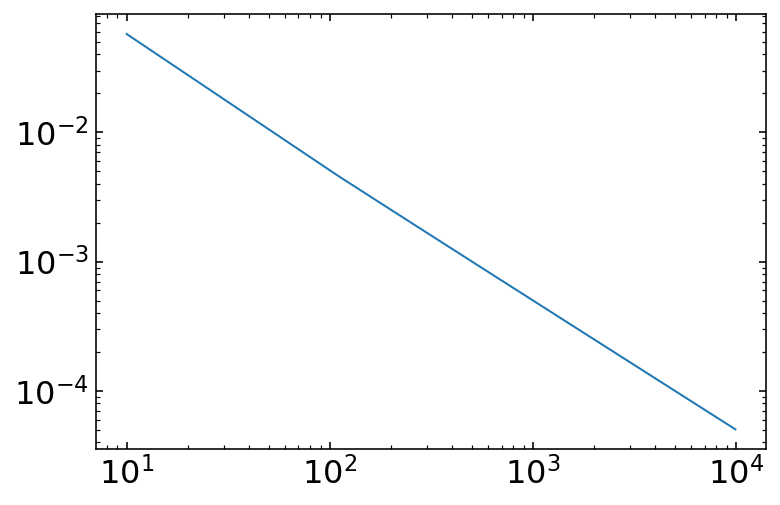

In [68]:
acc=[]
for N in range(10,10000,100):
    acc.append(int_box(f,0,1,N)-1/3)
plt.loglog(range(10,10000,100),acc)    

## Trapezoid method

![](img/trapez.png)

The trapezoid method is taking the next step of function approximation in the interval $\Delta x$. It is approximating it with a linear function.

\begin{equation}
\int_{a}^{b}f(x)dx=\sum_{i=1}^{N}\frac{f(x_i)+f(x_{i-1})}{2}\Delta x
\end{equation}

which is actually the same as

\begin{equation}
\int_{a}^{b}f(x)dx=\left[ \frac{f(x_{0}+f(x_{N}))}{2} +\sum_{i=1}^{N-1} f(x_{i})\right ]\Delta x
\end{equation}

We will use the first formula for coding it, and you may try the second yourself.

In [72]:
def int_trap(f,a,b,N):
    x=np.linspace(a,b,N)
    y=f(x)
    return(np.sum((y[1:]+y[:-1])*(x[1]-x[0])/2))


In [74]:
## value from the box method
int_box(f,0,1,100)

0.3384008434513486

In [75]:
## value from the tapez method
int_trap(f,0,1,100)

0.33335033840084355

The trapez method therefore seems to give a better accuracy than the box method for the same number of steps.

## Simpson method

The Simpson method now continues with approximating the function now with a collection of parabolas. 

\begin{equation}
\int_{a}^{b}f(x)dx \approx \sum_{i=1}^{\frac{N-1}{2}}\int_{x_{2i-1}}^{x_{2i+1}}g_{i}(x)dx
\end{equation}

where the function $g_i(x)$ is a parabola

\begin{equation}
g_{i}(x)=[A]x^2+[B]x+[C]
\end{equation}

where the $[A],[B],[C]$ depends only on the function values at the edges of the slice.

![Simpson](img/simpson.png)

After some extensive algebra, which we do not want to do in detail, we arrive at 

\begin{equation}
\int_{a}^{b}f(x)dx \approx\frac{\Delta x}{3}\sum_{i={\rm odd}}^{N-1}(f(x_{i-1})+f(x_{i})+f(x_{i+1}))
\end{equation}

as a simple formula on how to calculate the integral of a function using the Simpson method. Note that this method requires N being an odd number, which generates an even number of slices. There is a correction for odd number of slices, which we do not consider here.

In [85]:
def int_simp(f,a,b,N):
    x=np.linspace(a,b,N)
    y=f(x)
    return(np.sum((y[0:-2:2]+4*y[1:-1:2]+y[2::2])*(x[1]-x[0])/3))

In [93]:
## value from the tapez method
int_trap(f,0,1,100)

0.33335033840084355

In [92]:
## value from the box method
int_box(f,0,1,100)

0.3384008434513486

In [94]:
## value from the simpson method
## take care, N needs to be odd
int_simp(f,0,1,99)

0.3333333333333332

It turns out, that the Simpson rule is indeed the best among the three methods we have considered. 
The error is the box method goes as $\Delta x$, the one of the trapezoid method as $\Delta x^2$, while the simpson method provides and accuracy going with $\Delta x^4$. Thus doubling the number of integration points decreases the error by a factor of 16.